In [6]:
# Cell 1: Import Libraries and Data Processing Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import os


# Load all datasets and merge them
def load_datasets():
    data = {}

    # AlephBERT
    alephbert_path = "alephbert_empathy_by_session.csv"
    if os.path.exists(alephbert_path):
        data['AlephBERT'] = pd.read_csv(alephbert_path)
        data['AlephBERT']['session_id'] = data['AlephBERT']['session_id'].astype(str)
        # Use the 1-5 scale scores and round them, then cast to int
        if 'empathy_scale_1_5' in data['AlephBERT'].columns:
            data['AlephBERT']['empathy_score'] = data['AlephBERT']['empathy_scale_1_5'].round().astype(int)
        else:
            data['AlephBERT']['empathy_score'] = data['AlephBERT']['empathy_score'].round().astype(int)

    # Multilingual Hebrew
    xlm_heb_path = "multilingual_hebrew_empathy_by_session.csv"
    if os.path.exists(xlm_heb_path):
        data['XLM-Heb'] = pd.read_csv(xlm_heb_path)
        data['XLM-Heb']['session_id'] = data['XLM-Heb']['session_id'].astype(str)
        # Use the 1-5 scale scores and round them, then cast to int
        if 'empathy_scale_1_5' in data['XLM-Heb'].columns:
            data['XLM-Heb']['empathy_score'] = data['XLM-Heb']['empathy_scale_1_5'].round().astype(int)
        else:
            data['XLM-Heb']['empathy_score'] = data['XLM-Heb']['empathy_score'].round().astype(int)

    # Multilingual English
    xlm_eng_path = "multilingual_english_empathy_by_session.csv"
    if os.path.exists(xlm_eng_path):
        data['XLM-Eng'] = pd.read_csv(xlm_eng_path)
        data['XLM-Eng']['session_id'] = data['XLM-Eng']['session_id'].astype(str)
        # Use the 1-5 scale scores and round them, then cast to int
        if 'empathy_scale_1_5' in data['XLM-Eng'].columns:
            data['XLM-Eng']['empathy_score'] = data['XLM-Eng']['empathy_scale_1_5'].round().astype(int)
        else:
            data['XLM-Eng']['empathy_score'] = data['XLM-Eng']['empathy_score'].round().astype(int)

    # English Specialized
    roberta_path = "english_specialized_empathy_by_session.csv"
    if os.path.exists(roberta_path):
        data['RoBERTa'] = pd.read_csv(roberta_path)
        data['RoBERTa']['session_id'] = data['RoBERTa']['session_id'].astype(str)
        # Use the 1-5 scale scores and round them, then cast to int
        if 'empathy_scale_1_5' in data['RoBERTa'].columns:
            data['RoBERTa']['empathy_score'] = data['RoBERTa']['empathy_scale_1_5'].round().astype(int)
        else:
            data['RoBERTa']['empathy_score'] = data['RoBERTa']['empathy_score'].round().astype(int)

    # LLM Judge
    llm_path = "llm_empathy_by_session.csv"
    if os.path.exists(llm_path):
        data['LLM-Judge'] = pd.read_csv(llm_path)
        data['LLM-Judge']['session_id'] = data['LLM-Judge']['session_id'].astype(str)
        # Round the empathy score
        data['LLM-Judge']['empathy_score'] = data['LLM-Judge']['empathy_score'].round().astype(int)

    # Ground truth
    empathy_db_path = "empathy_db.csv"
    if os.path.exists(empathy_db_path):
        data['Ground-Truth'] = pd.read_csv(empathy_db_path)
        data['Ground-Truth']['session_id'] = data['Ground-Truth']['ID'].astype(str)

    return data

def create_combined_dataframe(data, include_llm=True):
    """Create a single dataframe with all models for comparison"""
    models = ['AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa']
    if include_llm:
        models.append('LLM-Judge')

    available_models = [m for m in models if m in data]

    combined = None

    for model in available_models:
        temp_df = data[model][['session_id', 'empathy_score']].copy()
        temp_df.rename(columns={'empathy_score': model}, inplace=True)

        if combined is None:
            combined = temp_df
        else:
            combined = combined.merge(temp_df, on='session_id', how='outer')

    # Add ground truth if available
    if 'Ground-Truth' in data:
        gt_df = data['Ground-Truth'][['session_id', 'empathy_words']].copy()
        gt_df.rename(columns={'empathy_words': 'Ground-Truth'}, inplace=True)
        combined = combined.merge(gt_df, on='session_id', how='outer')

    return combined

# Load data and create combined dataframe
print("Loading datasets...")
data = load_datasets()

print(f"Loaded data for {', '.join(data.keys())}")

# Create combined dataframe with all models including LLM
combined_all_df = create_combined_dataframe(data, include_llm=True)
combined_all_df.to_csv("combined_data.csv", index=False)
print(f"Combined all models dataframe saved to {'combined_data.csv'}")


Loading datasets...
Loaded data for AlephBERT, XLM-Heb, XLM-Eng, RoBERTa, LLM-Judge, Ground-Truth
Combined all models dataframe saved to combined_data.csv


In [7]:
combined_all_df

,session_id,AlephBERT,XLM-Heb,XLM-Eng,RoBERTa,LLM-Judge,Ground-Truth
0,101,4,4,2,2,3,5
1,102,2,2,1,1,4,5
2,103,2,2,1,1,4,5
3,104,3,3,1,1,4,5
4,105,3,3,3,3,3,5
5,106,5,5,4,4,3,4
6,107,1,1,1,1,4,3
7,108,2,2,1,2,4,4
8,109,1,1,2,2,2,2
9,110,5,5,4,4,4,5


In [47]:
import pandas as pd

df = pd.read_csv("combined_data.csv")
print(df.columns)


Index(['session_id', 'AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa', 'LLM-Judge',
       'Ground-Truth'],
      dtype='object')


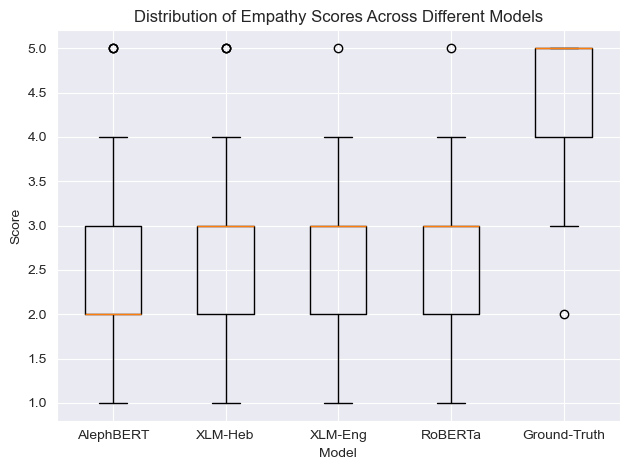

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a boxplot of scores, grouped by model
plt.figure()
models = ['AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa', 'Ground-Truth']

# We will prepare data for a boxplot: a list of arrays, each array is all scores for a model
data_to_plot = []
for m in models:
    subset = df[m].values
    data_to_plot.append(subset)

plt.boxplot(data_to_plot, labels=models)
plt.title("Distribution of Empathy Scores Across Different Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

In [49]:
# code to present the statistics of the data in a table
stats_df = df.describe()

# remove the % rows and the session_id column
stats_df = stats_df.drop(['25%', '50%', '75%', "count"], axis=0)
stats_df = stats_df.drop('session_id', axis=1)

# round the values to 2 decimal places
stats_df = stats_df.round(2)

stats_df

,AlephBERT,XLM-Heb,XLM-Eng,RoBERTa,LLM-Judge,Ground-Truth
mean,2.59,2.68,2.54,2.59,3.27,4.59
std,1.04,1.06,1.02,0.98,0.80,0.72
min,1.00,1.00,1.00,1.00,2.00,2.00
max,5.00,5.00,5.00,5.00,4.00,5.00


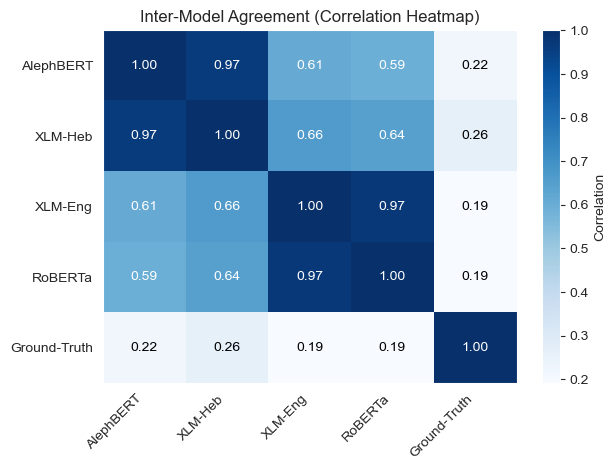

              AlephBERT   XLM-Heb   XLM-Eng   RoBERTa  Ground-Truth
AlephBERT      1.000000  0.965226  0.607401  0.594577      0.218129
XLM-Heb        0.965226  1.000000  0.659911  0.644916      0.259023
XLM-Eng        0.607401  0.659911  1.000000  0.974246      0.192577
RoBERTa        0.594577  0.644916  0.974246  1.000000      0.191378
Ground-Truth   0.218129  0.259023  0.192577  0.191378      1.000000


In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Specify the model columns you actually have
model_cols = ['AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa', 'Ground-Truth']
# If your columns are spelled differently, fix them here, e.g.
# model_cols = ['AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa', 'LLM_Judge']

# 3) Extract just those columns (dropping SessionID and anything else)
df_models = df[model_cols]

# 4) Compute the Pearson correlation among these model columns
corr_matrix = df_models.corr(method='pearson')

# 5) Create the heatmap
plt.figure()
plt.imshow(corr_matrix, cmap='Blues', aspect='auto')

# Remove gridlines
plt.grid(visible=False)

# Add colorbar
plt.colorbar(label='Correlation')

# Set x/y tick labels
plt.xticks(range(len(model_cols)), model_cols, rotation=45, ha='right')
plt.yticks(range(len(model_cols)), model_cols)

# Write correlation values on each cell with adjusted text color
for (i, j), val in np.ndenumerate(corr_matrix.values):
    # Determine text color based on brightness (light text on dark colors)
    text_color = 'white' if val > 0.5 else 'black'
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color=text_color)

plt.title("Inter-Model Agreement (Correlation Heatmap)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# If you just want the numeric table:
print(corr_matrix)

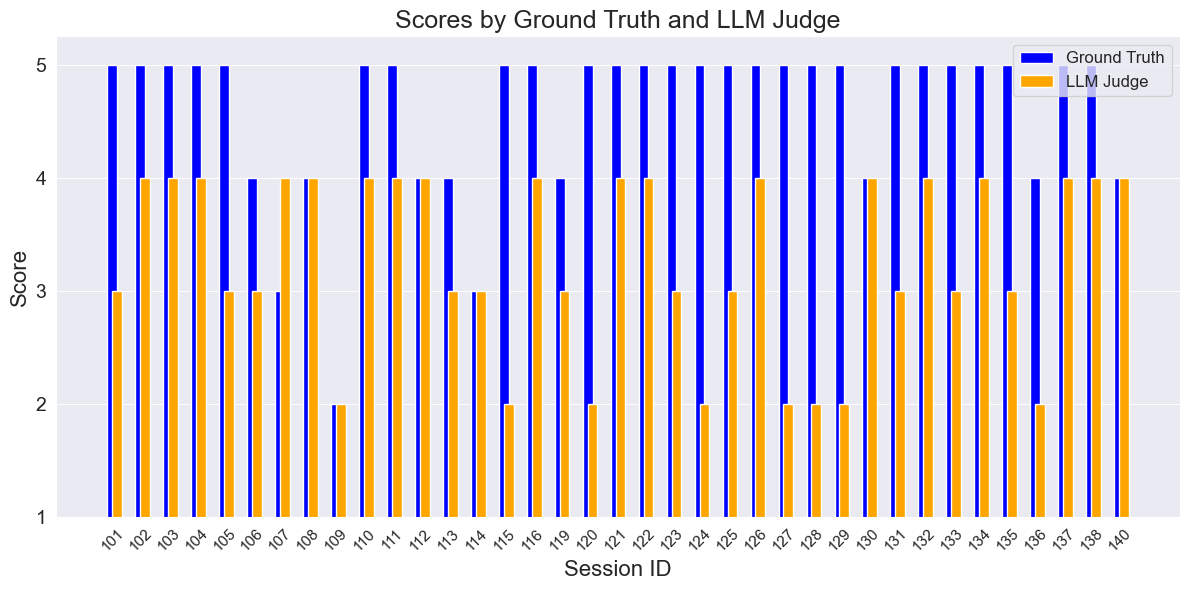

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
x = df['session_id'].astype(str)  # Treat IDs as categorical by converting to string
ground_truth_y = df['Ground-Truth']
llm_judge_y = df['LLM-Judge']

# Bar Plot
width = 0.35  # Width of each bar (slightly reduced for spacing)

plt.figure(figsize=(12, 6))
# Blue bars for Ground Truth
bars1 = plt.bar(x, ground_truth_y, width=width, label='Ground Truth', color='blue', align='center')
# Orange bars for LLM Judge
bars2 = plt.bar(x, llm_judge_y, width=width, label='LLM Judge', color='orange', align='edge')

# Adding labels and title
plt.xlabel('Session ID', fontsize=16)  # Enlarge label font size
plt.ylabel('Score', fontsize=16)       # Enlarge label font size
plt.title('Scores by Ground Truth and LLM Judge', fontsize=18)  # Enlarge title font size
plt.legend(fontsize=12)  # Enlarge legend font size

# Set x-ticks as categorical and rotate for better readability
plt.xticks(range(len(x)), x, rotation=45, fontsize=11)

# Set the y-axis to start from 1
plt.ylim(1, None)

# Ensure y-ticks are only integers
y_min, y_max = plt.ylim()
plt.yticks(range(int(y_min), int(y_max) + 1), fontsize=14)  # Enlarge y-tick font size

# Emphasize horizontal gridlines
plt.grid(visible=True, axis='y', which='both', linestyle='--', linewidth=0.7)
plt.gca().xaxis.grid(False)

# Emphasize horizontal gridlines even more with stronger color
plt.gca().yaxis.grid(True, linestyle='-', linewidth=0.7)

plt.tight_layout()
plt.savefig('ground_truth_vs_llm_judge.png')
plt.show()

In [52]:
import pandas as pd

# Calculate average error for each model including "LLM-Judge" and "LLM-Judge + 1"
models_with_llm = ['AlephBERT', 'XLM-Heb', 'XLM-Eng', 'RoBERTa', 'LLM-Judge', 'LLM-Judge + 1', 'Ground-Truth']
errors = {}

# Main calculation
for model in models_with_llm:
    if model == 'LLM-Judge + 1':
        avg_error = abs(df['LLM-Judge'] + 1 - df['Ground-Truth']).mean()
    elif model == 'LLM-Judge':
        avg_error = abs(df['LLM-Judge'] - df['Ground-Truth']).mean()
    elif model != 'Ground-Truth':
        avg_error = abs(df[model] - df['Ground-Truth']).mean()
    else:
        continue
    errors[model] = avg_error.round(2)

# Convert to DataFrame and sort
errors_df = pd.DataFrame.from_dict(errors, orient='index', columns=['Average Error']).sort_values(by='Average Error')
errors_df

,Average Error
LLM-Judge + 1,0.76
LLM-Judge,1.38
XLM-Heb,1.97
RoBERTa,2.00
AlephBERT,2.05
XLM-Eng,2.05


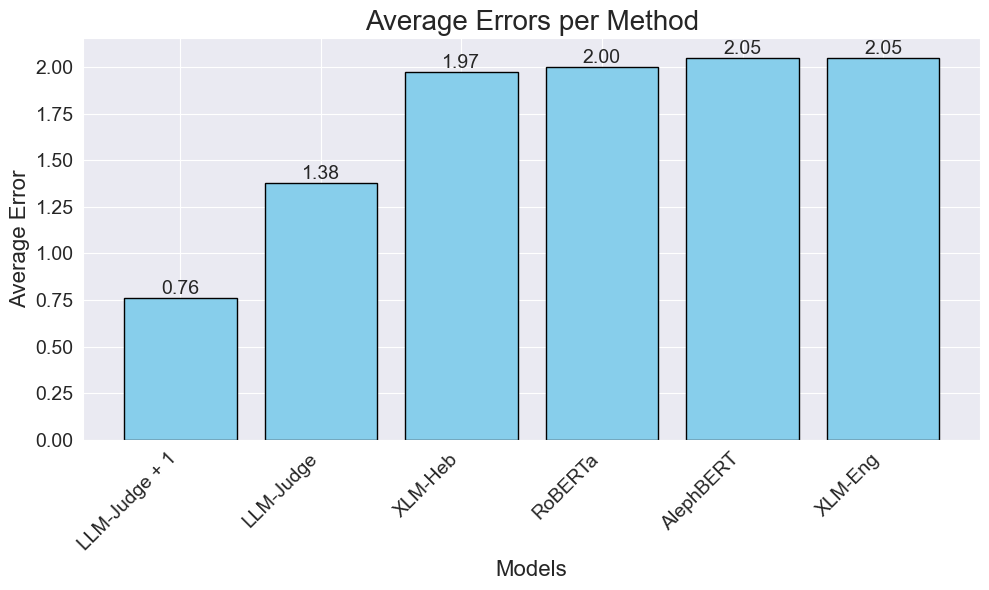

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a bar plot of the average errors sorted from low to high
plt.figure(figsize=(10, 6))
errors_df_sorted = errors_df.sort_values(by='Average Error', ascending=True)  # Ensure it's sorted
bars = plt.bar(errors_df_sorted.index, errors_df_sorted['Average Error'], color='skyblue', edgecolor='black')

# Add the values to the top of the bars with a larger font size
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=14)

# Add labels and title
plt.xlabel('Models', fontsize=16)
plt.ylabel('Average Error', fontsize=16)
plt.title('Average Errors per Method', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('average_errors.png')
plt.show()